In [ ]:
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

In [ ]:
import dask.dataframe as dd

dir = '/content/drive/MyDrive/green_trip_data/green_data.parquet'
ddf = dd.read_parquet(dir, blocksize="256MB")  # or smaller if needed

ddf = ddf.drop(columns=['VendorID', 'store_and_fwd_flag', 'payment_type', 'trip_type'])
ddf = ddf.repartition(partition_size="256MB")

ddf.to_parquet(
    '/content/drive/MyDrive/green_trip_data/green_data_cleaned.parquet',
    write_metadata_file=False
)


In [ ]:
import pyarrow.parquet as pq
import pyarrow as pa

# Read the full dataset as a single Arrow table
table = pq.read_table('/content/drive/MyDrive/green_trip_data/green_data_cleaned.parquet')

# Write to a single .parquet file
pq.write_table(table, '/content/drive/MyDrive/green_trip_data/green_data_cleaned_single.parquet')


In [ ]:
import pyarrow.parquet as pq

# Read Parquet schema
schema = pq.read_schema("/content/drive/MyDrive/green_trip_data/green_data_cleaned_single.parquet")
print(schema)

lpep_pickup_datetime: timestamp[us]
lpep_dropoff_datetime: timestamp[us]
RatecodeID: double
PULocationID: int64
DOLocationID: int64
passenger_count: double
trip_distance: double
fare_amount: double
extra: double
mta_tax: double
tip_amount: double
tolls_amount: double
ehail_fee: string
improvement_surcharge: double
total_amount: double
congestion_surcharge: double
cbd_congestion_fee: double
__null_dask_index__: int64
-- schema metadata --
pandas: '{"index_columns": ["__null_dask_index__"], "column_indexes": [{"' + 2530


#Green Taxi processing

In [ ]:
import pandas as pd
table = pq.read_table('/content/drive/MyDrive/green_trip_data/green_data_cleaned_single.parquet')
df = table.to_pandas()  # Convert to Pandas DataFrame for easier viewing

In [ ]:
df['cbd_congestion_fee'] = df['cbd_congestion_fee'].fillna(0)
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(0)
display(df.head())


,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,congestion_surcharge,cbd_congestion_fee
__null_dask_index__,,,,,,,,,,,,,,,,,
0,2019-12-18 15:52:30,2019-12-18 15:54:39,1.0,264,264,5.0,0.00,3.5,0.50,0.5,0.01,0.0,None,0.3,4.81,0.00,0.0
1,2020-01-01 00:45:58,2020-01-01 00:56:39,5.0,66,65,2.0,1.28,20.0,0.00,0.0,4.06,0.0,None,0.3,24.36,0.00,0.0
2,2020-01-01 00:41:38,2020-01-01 00:52:49,1.0,181,228,1.0,2.47,10.5,0.50,0.5,3.54,0.0,None,0.3,15.34,0.00,0.0
3,2020-01-01 00:52:46,2020-01-01 01:14:21,1.0,129,263,2.0,6.30,21.0,3.25,0.5,0.00,0.0,None,0.3,25.05,2.75,0.0
4,2020-01-01 00:19:57,2020-01-01 00:30:56,1.0,210,150,1.0,2.30,10.0,0.50,0.5,0.00,0.0,None,0.3,11.30,0.00,0.0


In [ ]:
df['total_amount'] = df['fare_amount'] + df['extra'] + df['mta_tax'] + df['tip_amount'] + df['tolls_amount'] + df['improvement_surcharge'] + df['congestion_surcharge'] + df['cbd_congestion_fee']
display(df.head())


,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,congestion_surcharge,cbd_congestion_fee
__null_dask_index__,,,,,,,,,,,,,,,,,
0,2019-12-18 15:52:30,2019-12-18 15:54:39,1.0,264,264,5.0,0.00,3.5,0.50,0.5,0.01,0.0,None,0.3,4.81,0.00,0.0
1,2020-01-01 00:45:58,2020-01-01 00:56:39,5.0,66,65,2.0,1.28,20.0,0.00,0.0,4.06,0.0,None,0.3,24.36,0.00,0.0
2,2020-01-01 00:41:38,2020-01-01 00:52:49,1.0,181,228,1.0,2.47,10.5,0.50,0.5,3.54,0.0,None,0.3,15.34,0.00,0.0
3,2020-01-01 00:52:46,2020-01-01 01:14:21,1.0,129,263,2.0,6.30,21.0,3.25,0.5,0.00,0.0,None,0.3,27.80,2.75,0.0
4,2020-01-01 00:19:57,2020-01-01 00:30:56,1.0,210,150,1.0,2.30,10.0,0.50,0.5,0.00,0.0,None,0.3,11.30,0.00,0.0


In [ ]:
df_sorted = df.sort_values(by='total_amount')
display(df_sorted.head(50))


,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,congestion_surcharge,cbd_congestion_fee
__null_dask_index__,,,,,,,,,,,,,,,,,
4851014,2023-09-18 02:57:31,2023-09-18 03:01:44,5.0,28,28,1.0,0.00,-500.00,0.0,0.0,0.0,0.0,None,-1.0,-501.00,0.0,0.0
1666003,2024-04-26 12:57:59,2024-04-26 12:58:24,5.0,265,265,2.0,0.00,-450.00,0.0,0.0,0.0,0.0,None,-1.0,-451.00,0.0,0.0
4872650,2023-09-28 20:21:08,2023-09-28 20:27:57,5.0,130,130,1.0,0.00,-400.00,0.0,0.0,0.0,0.0,None,-1.0,-401.00,0.0,0.0
4035464,2022-09-10 18:40:47,2022-09-10 18:41:08,5.0,196,196,2.0,0.00,-350.08,0.0,0.0,0.0,0.0,None,-0.3,-350.38,0.0,0.0
2693796,2021-05-03 04:59:18,2021-05-03 05:03:32,5.0,130,130,1.0,0.00,-300.00,0.0,-0.5,0.0,0.0,None,-0.3,-300.80,0.0,0.0
3997435,2022-08-25 20:19:38,2022-08-25 20:20:23,5.0,55,55,1.0,0.01,-300.00,0.0,0.0,0.0,0.0,None,-0.3,-300.30,0.0,0.0
1595982,2024-03-19 15:40:29,2024-03-19 15:40:36,5.0,121,121,1.0,0.03,-295.08,0.0,0.0,0.0,0.0,None,-1.0,-296.08,0.0,0.0
2405014,2021-01-21 01:06:09,2021-01-21 01:25:19,5.0,265,265,1.0,0.00,-280.00,0.0,0.0,0.0,0.0,None,-0.3,-280.30,0.0,0.0
4856711,2023-09-20 18:50:49,2023-09-20 18:55:02,5.0,55,55,1.0,0.40,-275.00,0.0,0.0,0.0,0.0,None,-1.0,-276.00,0.0,0.0


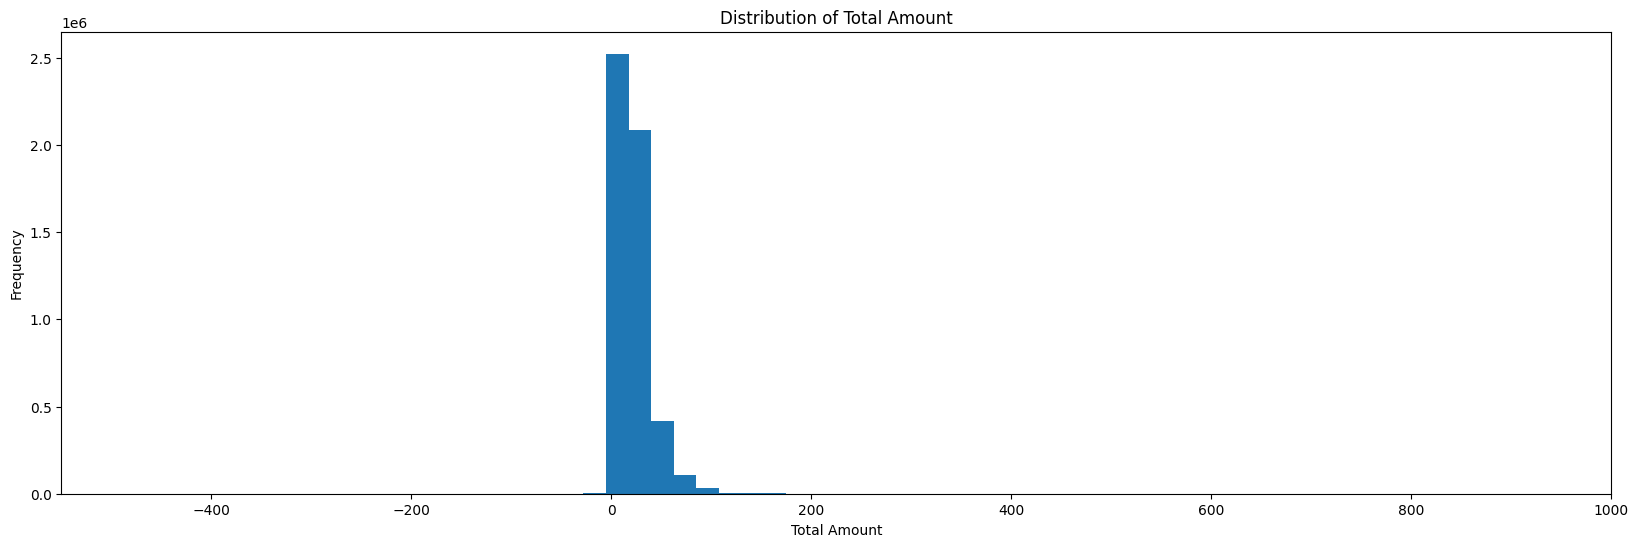

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pyarrow.parquet as pq

# Plotting 'total_amount'
plt.figure(figsize=(20, 6))
plt.hist(df['total_amount'], bins=200)  # Adjust the number of bins as needed
plt.xlabel('Total Amount')
plt.xlim(-550, 1000)  # Adjust range for better view
plt.ylabel('Frequency')
plt.title('Distribution of Total Amount')
plt.show()


In [ ]:
print(df.describe())  # Shows min, max, and percentiles

             lpep_pickup_datetime       lpep_dropoff_datetime    RatecodeID  \
count                     5185558                     5185558  4.070274e+06   
mean   2022-01-08 19:12:11.561218  2022-01-08 19:33:01.997572  1.172037e+00   
min           2008-12-31 00:00:00         2008-12-31 00:00:00  1.000000e+00   
25%           2020-07-31 09:24:09         2020-07-31 09:42:00  1.000000e+00   
50%    2021-10-31 11:38:58.500000         2021-10-31 12:00:55  1.000000e+00   
75%    2023-04-19 19:34:20.250000  2023-04-19 19:52:33.750000  1.000000e+00   
max           2041-08-17 16:24:38         2041-08-17 16:27:20  9.900000e+01   
std                           NaN                         NaN  1.028055e+00   

       PULocationID  DOLocationID  passenger_count  trip_distance  \
count  5.185558e+06  5.185558e+06     4.070274e+06   5.185558e+06   
mean   1.038038e+02  1.346387e+02     1.291656e+00   5.527553e+01   
min    1.000000e+00  1.000000e+00     0.000000e+00  -3.369000e+01   
25%    6.500

In [ ]:
#Drop rows with fare 0 or less and trip_distance = 0
df = df[df['total_amount'] > 0]
df = df[df['trip_distance'] > 0]

count = (df["total_amount"] <= 0).sum()
print(f"Rows with values ≤ 0: {count}")

Rows with values ≤ 0: 0


In [ ]:
# Calculate 'fare_per_mile'
df['fare_per_mile'] = df['total_amount'] / df['trip_distance']

display(df.head())


,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,congestion_surcharge,cbd_congestion_fee,fare_per_mile
__null_dask_index__,,,,,,,,,,,,,,,,,,
1,2020-01-01 00:45:58,2020-01-01 00:56:39,5.0,66,65,2.0,1.28,20.0,0.00,0.0,4.06,0.0,None,0.3,24.36,0.00,0.0,19.031250
2,2020-01-01 00:41:38,2020-01-01 00:52:49,1.0,181,228,1.0,2.47,10.5,0.50,0.5,3.54,0.0,None,0.3,15.34,0.00,0.0,6.210526
3,2020-01-01 00:52:46,2020-01-01 01:14:21,1.0,129,263,2.0,6.30,21.0,3.25,0.5,0.00,0.0,None,0.3,27.80,2.75,0.0,4.412698
4,2020-01-01 00:19:57,2020-01-01 00:30:56,1.0,210,150,1.0,2.30,10.0,0.50,0.5,0.00,0.0,None,0.3,11.30,0.00,0.0,4.913043
5,2020-01-01 00:52:33,2020-01-01 01:09:54,1.0,35,39,1.0,3.00,13.5,0.50,0.5,0.00,0.0,None,0.3,14.80,0.00,0.0,4.933333


In [ ]:
df.shape

(4937066, 18)

In [ ]:
#Fix column names

df.rename(columns={'lpep_pickup_datetime': 'pickup_datetime',
                   'lpep_dropoff_datetime': 'dropoff_datetime',
                   'PULocationID': 'pickup_location_id',
                   'DOLocationID': 'dropoff_location_id'
                   }, inplace=True)

df.head()

,pickup_datetime,dropoff_datetime,RatecodeID,pickup_location_id,dropoff_location_id,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,congestion_surcharge,cbd_congestion_fee,fare_per_mile
__null_dask_index__,,,,,,,,,,,,,,,,,,
1,2020-01-01 00:45:58,2020-01-01 00:56:39,5.0,66,65,2.0,1.28,20.0,0.00,0.0,4.06,0.0,None,0.3,24.36,0.00,0.0,19.031250
2,2020-01-01 00:41:38,2020-01-01 00:52:49,1.0,181,228,1.0,2.47,10.5,0.50,0.5,3.54,0.0,None,0.3,15.34,0.00,0.0,6.210526
3,2020-01-01 00:52:46,2020-01-01 01:14:21,1.0,129,263,2.0,6.30,21.0,3.25,0.5,0.00,0.0,None,0.3,27.80,2.75,0.0,4.412698
4,2020-01-01 00:19:57,2020-01-01 00:30:56,1.0,210,150,1.0,2.30,10.0,0.50,0.5,0.00,0.0,None,0.3,11.30,0.00,0.0,4.913043
5,2020-01-01 00:52:33,2020-01-01 01:09:54,1.0,35,39,1.0,3.00,13.5,0.50,0.5,0.00,0.0,None,0.3,14.80,0.00,0.0,4.933333


In [ ]:
# Convert 'pickup_datetime' and 'dropoff_datetime' to datetime objects
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

# Extract date and time components
df['pickup_date'] = df['pickup_datetime'].dt.date
df['pickup_time'] = df['pickup_datetime'].dt.time
df['dropoff_date'] = df['dropoff_datetime'].dt.date
df['dropoff_time'] = df['dropoff_datetime'].dt.time

# Calculate trip time in seconds
df['trip_time'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds()

In [ ]:
df.head()

,pickup_datetime,dropoff_datetime,RatecodeID,pickup_location_id,dropoff_location_id,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,improvement_surcharge,total_amount,congestion_surcharge,cbd_congestion_fee,fare_per_mile,pickup_date,pickup_time,dropoff_date,dropoff_time,trip_time
__null_dask_index__,,,,,,,,,,,,,,,,,,,,,
1,2020-01-01 00:45:58,2020-01-01 00:56:39,5.0,66,65,2.0,1.28,20.0,0.00,0.0,...,0.3,24.36,0.00,0.0,19.031250,2020-01-01,00:45:58,2020-01-01,00:56:39,641.0
2,2020-01-01 00:41:38,2020-01-01 00:52:49,1.0,181,228,1.0,2.47,10.5,0.50,0.5,...,0.3,15.34,0.00,0.0,6.210526,2020-01-01,00:41:38,2020-01-01,00:52:49,671.0
3,2020-01-01 00:52:46,2020-01-01 01:14:21,1.0,129,263,2.0,6.30,21.0,3.25,0.5,...,0.3,27.80,2.75,0.0,4.412698,2020-01-01,00:52:46,2020-01-01,01:14:21,1295.0
4,2020-01-01 00:19:57,2020-01-01 00:30:56,1.0,210,150,1.0,2.30,10.0,0.50,0.5,...,0.3,11.30,0.00,0.0,4.913043,2020-01-01,00:19:57,2020-01-01,00:30:56,659.0
5,2020-01-01 00:52:33,2020-01-01 01:09:54,1.0,35,39,1.0,3.00,13.5,0.50,0.5,...,0.3,14.80,0.00,0.0,4.933333,2020-01-01,00:52:33,2020-01-01,01:09:54,1041.0


In [ ]:
# Define the columns to move and their desired order
cols_to_move = ['pickup_date', 'pickup_time', 'dropoff_date', 'dropoff_time', 'trip_time']

# Get the columns not being moved
other_cols = [col for col in df.columns if col not in cols_to_move and col != 'RatecodeID']

# Create the new column order
new_cols = cols_to_move + other_cols + ['RatecodeID']

# Reorder the columns in the DataFrame
df = df[new_cols]

In [ ]:
# df.drop(columns=['pickup_datetime', 'dropoff_datetime'], inplace=True)

In [ ]:
# Mapping RatecodeID values
ratecode_mapping = {
    1: 'Standard rate',
    2: 'JFK',
    3: 'Newark',
    4: 'Nassau or Westchester',
    5: 'Negotiated fare',
    6: 'Group ride',
    float('nan'): 'Unknown'
}

df['RatecodeID'] = df['RatecodeID'].map(ratecode_mapping)
df.head()

In [ ]:
pd.set_option("display.max_columns", None)  # Show all columns
df.shape


(4937066, 23)

In [ ]:
df.to_parquet('/content/drive/MyDrive/green_trip_data/green_tripdata_processed.parquet')


In [ ]:
import pandas as pd
table = pq.read_table('/content/drive/MyDrive/green_trip_data/green_data_cleaned_single.parquet')
df = table.to_pandas()  # Convert to Pandas DataFrame for easier viewing

In [ ]:
display(df.head())

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,congestion_surcharge,cbd_congestion_fee
__null_dask_index__,,,,,,,,,,,,,,,,,
0,2019-12-18 15:52:30,2019-12-18 15:54:39,1.0,264,264,5.0,0.00,3.5,0.50,0.5,0.01,0.0,None,0.3,4.81,0.00,NaN
1,2020-01-01 00:45:58,2020-01-01 00:56:39,5.0,66,65,2.0,1.28,20.0,0.00,0.0,4.06,0.0,None,0.3,24.36,0.00,NaN
2,2020-01-01 00:41:38,2020-01-01 00:52:49,1.0,181,228,1.0,2.47,10.5,0.50,0.5,3.54,0.0,None,0.3,15.34,0.00,NaN
3,2020-01-01 00:52:46,2020-01-01 01:14:21,1.0,129,263,2.0,6.30,21.0,3.25,0.5,0.00,0.0,None,0.3,25.05,2.75,NaN
4,2020-01-01 00:19:57,2020-01-01 00:30:56,1.0,210,150,1.0,2.30,10.0,0.50,0.5,0.00,0.0,None,0.3,11.30,0.00,NaN


In [ ]:
df['cbd_congestion_fee'] = df['cbd_congestion_fee'].fillna(0)
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(0)
display(df.head())


,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,congestion_surcharge,cbd_congestion_fee
__null_dask_index__,,,,,,,,,,,,,,,,,
0,2019-12-18 15:52:30,2019-12-18 15:54:39,1.0,264,264,5.0,0.00,3.5,0.50,0.5,0.01,0.0,None,0.3,4.81,0.00,0.0
1,2020-01-01 00:45:58,2020-01-01 00:56:39,5.0,66,65,2.0,1.28,20.0,0.00,0.0,4.06,0.0,None,0.3,24.36,0.00,0.0
2,2020-01-01 00:41:38,2020-01-01 00:52:49,1.0,181,228,1.0,2.47,10.5,0.50,0.5,3.54,0.0,None,0.3,15.34,0.00,0.0
3,2020-01-01 00:52:46,2020-01-01 01:14:21,1.0,129,263,2.0,6.30,21.0,3.25,0.5,0.00,0.0,None,0.3,25.05,2.75,0.0
4,2020-01-01 00:19:57,2020-01-01 00:30:56,1.0,210,150,1.0,2.30,10.0,0.50,0.5,0.00,0.0,None,0.3,11.30,0.00,0.0


In [ ]:
df['total_amount'] = df['fare_amount'] + df['extra'] + df['mta_tax'] + df['tip_amount'] + df['tolls_amount'] + df['improvement_surcharge'] + df['congestion_surcharge'] + df['cbd_congestion_fee']
display(df.head())


,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,congestion_surcharge,cbd_congestion_fee
__null_dask_index__,,,,,,,,,,,,,,,,,
0,2019-12-18 15:52:30,2019-12-18 15:54:39,1.0,264,264,5.0,0.00,3.5,0.50,0.5,0.01,0.0,None,0.3,4.81,0.00,0.0
1,2020-01-01 00:45:58,2020-01-01 00:56:39,5.0,66,65,2.0,1.28,20.0,0.00,0.0,4.06,0.0,None,0.3,24.36,0.00,0.0
2,2020-01-01 00:41:38,2020-01-01 00:52:49,1.0,181,228,1.0,2.47,10.5,0.50,0.5,3.54,0.0,None,0.3,15.34,0.00,0.0
3,2020-01-01 00:52:46,2020-01-01 01:14:21,1.0,129,263,2.0,6.30,21.0,3.25,0.5,0.00,0.0,None,0.3,27.80,2.75,0.0
4,2020-01-01 00:19:57,2020-01-01 00:30:56,1.0,210,150,1.0,2.30,10.0,0.50,0.5,0.00,0.0,None,0.3,11.30,0.00,0.0


#Yellow Taxi processing

In [36]:
import dask_cudf

gdf = dask_cudf.read_parquet(
       '/content/drive/MyDrive/yellow_trip_data/yellow_data_cleaned_single.parquet'
   )

In [5]:
# prompt: view gdf columns

gdf.columns


Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'airport_fee', 'Airport_fee', 'cbd_congestion_fee'],
      dtype='object')

Drop columns

In [37]:
gdf = gdf.drop(columns=['airport_fee'])

Fill NaN

In [38]:
# Assuming gdf is already defined as a dask_cudf DataFrame
gdf['cbd_congestion_fee'] = gdf['cbd_congestion_fee'].fillna(0)
gdf['congestion_surcharge'] = gdf['congestion_surcharge'].fillna(0)
gdf['Airport_fee'] = gdf['Airport_fee'].fillna(0)

In [4]:
# Assuming gdf is already defined as a dask_cudf DataFrame and airport_fee column exists
not_na_count = gdf['Airport_fee'].isna().sum().compute()
print(f"Number of rows in 'Airport_fee' where the value is NA: {not_na_count}")


Number of rows in 'Airport_fee' where the value is NA: 0


In [5]:
# Get the total number of rows
num_rows = gdf.shape[0].compute()

print(f"Total number of rows in gdf: {num_rows}")

Total number of rows in gdf: 181742213


---------------------------------------------------------------------------

tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'airport_fee', 'Airport_fee', 'cbd_congestion_fee'],
      dtype='object')

In [39]:
gdf['total_amount'] = gdf['fare_amount'] + gdf['extra'] + gdf['mta_tax'] + gdf['tip_amount'] + gdf['tolls_amount'] + gdf['improvement_surcharge'] + gdf['congestion_surcharge'] + gdf['cbd_congestion_fee'] + gdf['Airport_fee']
display(gdf.head())

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,238,239,6.0,3.0,0.5,1.47,0.0,0.3,13.77,2.5,0.0,0.0
1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,239,238,7.0,3.0,0.5,1.50,0.0,0.3,14.80,2.5,0.0,0.0
2,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,238,238,6.0,3.0,0.5,1.00,0.0,0.3,13.30,2.5,0.0,0.0
3,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,238,151,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,0.0,0.0
4,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,193,193,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,0.0,0.0


(array([2.0191000e+04, 2.4014000e+04, 3.1170000e+04, 4.8409000e+04,
        7.2090000e+04, 1.3026300e+05, 2.4211000e+05, 3.6611000e+05,
        3.7420200e+05, 3.0268600e+05, 7.2980000e+05, 1.0445955e+07,
        4.4800292e+07, 4.5152109e+07, 2.7573089e+07, 1.5155160e+07,
        8.6058540e+06, 5.3197150e+06, 3.6013160e+06, 2.6411840e+06,
        1.9644430e+06, 1.6746710e+06, 1.6766450e+06, 1.6490600e+06,
        1.9450840e+06, 1.3683500e+06, 1.1689020e+06, 8.2472800e+05,
        7.6758600e+05, 1.2039850e+06, 6.2415200e+05, 2.8389300e+05,
        1.2544200e+05, 8.9193000e+04, 8.0628000e+04, 6.2813000e+04,
        5.3988000e+04, 4.3354000e+04, 3.7007000e+04, 2.9624000e+04,
        2.7044000e+04, 1.9392000e+04, 1.7541000e+04, 1.4239000e+04,
        1.2827000e+04, 1.0637000e+04, 1.1165000e+04, 8.5370000e+03,
        7.6370000e+03, 7.4360000e+03]),
 array([-50., -45., -40., -35., -30., -25., -20., -15., -10.,  -5.,   0.,
          5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,  5

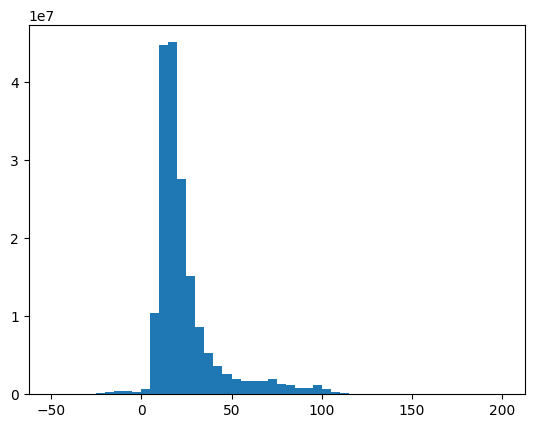

In [37]:
import matplotlib.pyplot as plt

filtered_data = gdf['total_amount'].compute().to_pandas()
filtered_data = filtered_data[filtered_data.between(-50, 200)]
plt.hist(filtered_data, bins=50)

Drop rows where total_amount and trip_distance < 0

In [40]:
#Drop rows with fare 0 or less and trip_distance = 0
gdf = gdf[gdf['total_amount'] > 0]
gdf = gdf[gdf['trip_distance'] > 0]

count = (gdf["total_amount"] <= 0).sum().compute()
print(f"Rows with values ≤ 0: {count}")


Rows with values ≤ 0: 0


In [41]:
# Calculate 'fare_per_mile'
gdf['fare_per_mile'] = gdf['total_amount'] / gdf['trip_distance']

display(gdf.head())


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee,fare_per_mile
0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,238,239,6.0,3.0,0.5,1.47,0.0,0.3,13.77,2.5,0.0,0.0,11.475000
1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,239,238,7.0,3.0,0.5,1.50,0.0,0.3,14.80,2.5,0.0,0.0,12.333333
2,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,238,238,6.0,3.0,0.5,1.00,0.0,0.3,13.30,2.5,0.0,0.0,22.166667
3,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,238,151,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,0.0,0.0,10.200000
5,2020-01-01 00:09:44,2020-01-01 00:10:37,1.0,0.03,1.0,7,193,2.5,0.5,0.5,0.00,0.0,0.3,3.80,0.0,0.0,0.0,126.666667


In [42]:
#Fix column names

gdf = gdf.rename(columns={'tpep_pickup_datetime': 'pickup_datetime',
                   'tpep_dropoff_datetime': 'dropoff_datetime',
                   'PULocationID': 'pickup_location_id',
                   'DOLocationID': 'dropoff_location_id'
                   })

gdf.head()

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,pickup_location_id,dropoff_location_id,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee,fare_per_mile
0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,238,239,6.0,3.0,0.5,1.47,0.0,0.3,13.77,2.5,0.0,0.0,11.475000
1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,239,238,7.0,3.0,0.5,1.50,0.0,0.3,14.80,2.5,0.0,0.0,12.333333
2,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,238,238,6.0,3.0,0.5,1.00,0.0,0.3,13.30,2.5,0.0,0.0,22.166667
3,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,238,151,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,0.0,0.0,10.200000
5,2020-01-01 00:09:44,2020-01-01 00:10:37,1.0,0.03,1.0,7,193,2.5,0.5,0.5,0.00,0.0,0.3,3.80,0.0,0.0,0.0,126.666667


In [43]:
# assume gdf is Dask-cuDF DataFrame, and pickup/dropoff are already datetime64[ns]
# if not, cast them:
gdf['pickup_datetime']  = gdf['pickup_datetime'].astype('datetime64[ns]')
gdf['dropoff_datetime'] = gdf['dropoff_datetime'].astype('datetime64[ns]')
# extract date and time as strings
gdf['pickup_date']   = gdf['pickup_datetime'].dt.strftime('%Y-%m-%d')
gdf['pickup_time']   = gdf['pickup_datetime'].dt.strftime('%H:%M:%S')
gdf['dropoff_date']  = gdf['dropoff_datetime'].dt.strftime('%Y-%m-%d')
gdf['dropoff_time']  = gdf['dropoff_datetime'].dt.strftime('%H:%M:%S')
# compute trip duration (this stays lazy until compute/write)
gdf['trip_time'] = (gdf['dropoff_datetime'] - gdf['pickup_datetime']).dt.total_seconds()


In [44]:
gdf = gdf.drop(columns=['pickup_datetime','dropoff_datetime'])
gdf.head()

,passenger_count,trip_distance,RatecodeID,pickup_location_id,dropoff_location_id,fare_amount,extra,mta_tax,tip_amount,tolls_amount,...,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee,fare_per_mile,pickup_date,pickup_time,dropoff_date,dropoff_time,trip_time
0,1.0,1.20,1.0,238,239,6.0,3.0,0.5,1.47,0.0,...,13.77,2.5,0.0,0.0,11.475000,2020-01-01,00:28:15,2020-01-01,00:33:03,288.0
1,1.0,1.20,1.0,239,238,7.0,3.0,0.5,1.50,0.0,...,14.80,2.5,0.0,0.0,12.333333,2020-01-01,00:35:39,2020-01-01,00:43:04,445.0
2,1.0,0.60,1.0,238,238,6.0,3.0,0.5,1.00,0.0,...,13.30,2.5,0.0,0.0,22.166667,2020-01-01,00:47:41,2020-01-01,00:53:52,371.0
3,1.0,0.80,1.0,238,151,5.5,0.5,0.5,1.36,0.0,...,8.16,0.0,0.0,0.0,10.200000,2020-01-01,00:55:23,2020-01-01,01:00:14,291.0
5,1.0,0.03,1.0,7,193,2.5,0.5,0.5,0.00,0.0,...,3.80,0.0,0.0,0.0,126.666667,2020-01-01,00:09:44,2020-01-01,00:10:37,53.0


In [45]:
cols_to_move = ['pickup_date', 'pickup_time', 'dropoff_date', 'dropoff_time', 'trip_time']

# All the other columns, excluding those five and RatecodeID
other_cols = [col for col in gdf.columns
              if col not in cols_to_move and col != 'RatecodeID']

# Build your new ordering
new_cols = cols_to_move + other_cols + ['RatecodeID']

# Reindex the dataframe
gdf = gdf[new_cols]


In [46]:
ratecode_mapping = {
    1: 'Standard rate',
    2: 'JFK',
    3: 'Newark',
    4: 'Nassau or Westchester',
    5: 'Negotiated fare',
    6: 'Group ride'
}
gdf['RatecodeID'] = gdf['RatecodeID'].map(ratecode_mapping)
gdf['RatecodeID'] = gdf['RatecodeID'].fillna('Unknown')

/usr/local/lib/python3.11/dist-packages/dask_expr/_collection.py:4225: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('RatecodeID', 'object'))

  warnings.warn(meta_warning(meta))


In [47]:
import os
import gc
from numba import cuda
import pyarrow.parquet as pq


# Directory for CPU-based Parquet output (avoids GPU OOM)
output_dir = '/content/drive/MyDrive/yellow_trip_data/processed_yellow_parquet/'
os.makedirs(output_dir, exist_ok=True)

try:
  # Iterate over each Dask-cuDF partition and write via PyArrow on CPU
  for i, delayed_part in enumerate(gdf.to_delayed()):
      # 1. Compute partition on GPU
      cudf_df = delayed_part.compute()

      # 2. Convert to Arrow Table in system RAM
      table = cudf_df.to_arrow()

      # 3. Write Parquet using PyArrow (CPU)
      out_path = os.path.join(output_dir, f'part-{i:04d}.parquet')
      pq.write_table(table, out_path, compression='snappy')

      # 4. Clean up GPU and CPU memory
      del cudf_df, table
      gc.collect()
      cuda.select_device(0)
except Exception as e:
    print("Parquet write failed:", repr(e))





Concatenate written files into single parquet

In [ ]:
import os
import glob
import pyarrow.parquet as pq
import pyarrow as pa

# Paths
parts_dir = '/content/drive/MyDrive/yellow_trip_data/processed_yellow_parquet/'
single_out = '/content/drive/MyDrive/yellow_trip_data/combined_yellow.parquet'


# Find and sort all part files
files = sorted(glob.glob(os.path.join(parts_dir, 'part-*.parquet')))
# Read each into an Arrow Table
tables = [pq.read_table(f) for f in files]
# Concatenate tables
combined = pa.concat_tables(tables)
# Write single output file
pq.write_table(combined, single_out, compression='snappy')


In [ ]:
import dask_cudf

gdf = dask_cudf.read_parquet(
       '/content/drive/MyDrive/yellow_trip_data/combined_yellow.parquet'
   )

gdf['vehicle_type'] = 'yellow'

In [ ]:
gdf = dask_cudf.read_parquet(
       '/content/drive/MyDrive/green_tripdata/green_tripdata_processed.parquet'
   )

gdf['vehicle_type'] = 'green'

#High-Volume Ride Sharing processing

In [1]:
import dask_cudf

gdf = dask_cudf.read_parquet(
       '/content/drive/MyDrive/fhvhv_trip_data/fhvhv_data.parquet'
   )

In [2]:
# prompt: view gdf columns

gdf.columns


Index(['hvfhs_license_num', 'request_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'cbd_congestion_fee',
       'company_name'],
      dtype='object')

In [3]:
gdf.head(1)

,hvfhs_license_num,request_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,cbd_congestion_fee,company_name
0,HV0003,2020-01-01 00:40:13,2020-01-01 00:45:34,2020-01-01 01:02:20,148,90,1.93,1006,30.44,0.0,0.76,2.7,2.75,<NA>,0.0,18.25,N,N,0.0,Uber


Drop columns

In [2]:
gdf = gdf.drop(columns=['hvfhs_license_num', 'shared_match_flag','shared_request_flag', 'driver_pay'])

Fill NaN

In [3]:
# Assuming gdf is already defined as a dask_cudf DataFrame
gdf[["cbd_congestion_fee", "congestion_surcharge", "airport_fee"]] = \
    gdf[["cbd_congestion_fee", "congestion_surcharge", "airport_fee"]].fillna(0)

In [6]:
toll_na_count = gdf['tolls'].isna().sum().compute()
print(f"Number of rows in 'tolls' where the value is NA: {toll_na_count}")

Number of rows in 'tolls' where the value is NA: 0


In [ ]:
# Assuming gdf is already defined as a dask_cudf DataFrame and airport_fee column exists
not_na_count = gdf['airport_fee'].isna().sum().compute()
print(f"Number of rows in 'airport_fee' where the value is NA: {not_na_count}")


Number of rows in 'Airport_fee' where the value is NA: 0


In [6]:
# Get the total number of rows
num_rows = gdf.shape[0].compute()
print(f"Total number of rows in gdf: {num_rows}")

Total number of rows in gdf: 1042028201


In [7]:
import gc
del num_rows
gc.collect()

304

---------------------------------------------------------------------------

In [4]:
gdf = gdf.assign(
    total_amount=gdf[
        ["base_passenger_fare", "bcf", "sales_tax", "tips", "tolls",
         "congestion_surcharge", "cbd_congestion_fee", "airport_fee"]
    ].sum(axis=1)
)
display(gdf.head())

,request_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,cbd_congestion_fee,company_name,total_amount
0,2020-01-01 00:40:13,2020-01-01 00:45:34,2020-01-01 01:02:20,148,90,1.93,1006,30.44,0.0,0.76,2.70,2.75,0.0,0.0,0.0,Uber,36.65
1,2020-01-01 00:42:31,2020-01-01 00:47:50,2020-01-01 00:53:23,114,79,0.81,333,14.80,0.0,0.37,1.31,2.75,0.0,0.0,0.0,Uber,19.23
2,2020-01-01 00:01:42,2020-01-01 00:04:37,2020-01-01 00:21:49,4,125,2.53,1032,15.63,0.0,0.47,1.39,2.75,0.0,3.0,0.0,Uber,23.24
3,2020-01-01 00:21:23,2020-01-01 00:26:36,2020-01-01 00:33:00,231,113,1.11,384,8.44,0.0,0.21,0.75,2.75,0.0,0.0,0.0,Uber,12.15
4,2020-01-01 00:32:20,2020-01-01 00:37:49,2020-01-01 00:46:59,114,144,1.10,550,11.57,0.0,0.29,1.03,2.75,0.0,0.0,0.0,Uber,15.64


In [21]:
import matplotlib.pyplot as plt
import dask.dataframe as dd

# Convert Dask-cuDF to Dask DataFrame (CPU)
filtered_data = gdf[gdf["total_amount"].between(-50, 1000)].compute().to_pandas()

# Process in chunks
chunks = filtered_data.to_delayed()
filtered_series_list = [chunk.compute()["total_amount"] for chunk in chunks]

# Concatenate into one Pandas Series
filtered_series = pd.concat(filtered_series_list)

# Create histogram
plt.figure(figsize=(10, 5))
plt.hist(filtered_series, bins=50, color="blue", edgecolor="black")
plt.xlabel("Total Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Total Amount")
plt.show()

AttributeError: 'DataFrame' object has no attribute 'to_dask_dataframe'

In [24]:
import gc
del gdf
gc.collect()

8393

Drop rows where total_amount and trip_distance < 0

In [5]:
#Drop rows with fare 0 or less and trip_distance = 0
gdf = gdf[(gdf["total_amount"] > 0) & (gdf["trip_miles"] > 0)]


# count = (gdf["total_amount"] <= 0).sum().compute()
# print(f"Rows with values ≤ 0: {count}")


In [6]:
# Calculate 'fare_per_mile'
gdf['fare_per_mile'] = gdf['total_amount'] / gdf['trip_miles']

display(gdf.head())


,request_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,cbd_congestion_fee,company_name,total_amount,fare_per_mile
0,2020-01-01 00:40:13,2020-01-01 00:45:34,2020-01-01 01:02:20,148,90,1.93,1006,30.44,0.0,0.76,2.70,2.75,0.0,0.0,0.0,Uber,36.65,18.989637
1,2020-01-01 00:42:31,2020-01-01 00:47:50,2020-01-01 00:53:23,114,79,0.81,333,14.80,0.0,0.37,1.31,2.75,0.0,0.0,0.0,Uber,19.23,23.740741
2,2020-01-01 00:01:42,2020-01-01 00:04:37,2020-01-01 00:21:49,4,125,2.53,1032,15.63,0.0,0.47,1.39,2.75,0.0,3.0,0.0,Uber,23.24,9.185771
3,2020-01-01 00:21:23,2020-01-01 00:26:36,2020-01-01 00:33:00,231,113,1.11,384,8.44,0.0,0.21,0.75,2.75,0.0,0.0,0.0,Uber,12.15,10.945946
4,2020-01-01 00:32:20,2020-01-01 00:37:49,2020-01-01 00:46:59,114,144,1.10,550,11.57,0.0,0.29,1.03,2.75,0.0,0.0,0.0,Uber,15.64,14.218182


Rename columns

      'request_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'cbd_congestion_fee',
       'company_name'

In [12]:
# #Fix column names

gdf = gdf.rename(columns={'trip_miles': 'trip_distance',
                   'PULocationID': 'pickup_location_id',
                   'DOLocationID': 'dropoff_location_id'
                   })

gdf.head()

,pickup_location_id,dropoff_location_id,trip_distance,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,cbd_congestion_fee,company_name,total_amount,fare_per_mile,pickup_date,pickup_time,dropoff_date,dropoff_time
0,148,90,1.93,1006,30.44,0.0,0.76,2.70,2.75,0.0,0.0,0.0,Uber,36.65,18.989637,2020-01-01,00:45:34,2020-01-01,01:02:20
1,114,79,0.81,333,14.80,0.0,0.37,1.31,2.75,0.0,0.0,0.0,Uber,19.23,23.740741,2020-01-01,00:47:50,2020-01-01,00:53:23
2,4,125,2.53,1032,15.63,0.0,0.47,1.39,2.75,0.0,3.0,0.0,Uber,23.24,9.185771,2020-01-01,00:04:37,2020-01-01,00:21:49
3,231,113,1.11,384,8.44,0.0,0.21,0.75,2.75,0.0,0.0,0.0,Uber,12.15,10.945946,2020-01-01,00:26:36,2020-01-01,00:33:00
4,114,144,1.10,550,11.57,0.0,0.29,1.03,2.75,0.0,0.0,0.0,Uber,15.64,14.218182,2020-01-01,00:37:49,2020-01-01,00:46:59


In [7]:
# assume gdf is Dask-cuDF DataFrame, and pickup/dropoff are already datetime64[ns]
# if not, cast them:
gdf['pickup_datetime']  = gdf['pickup_datetime'].astype('datetime64[ns]')
gdf['dropoff_datetime'] = gdf['dropoff_datetime'].astype('datetime64[ns]')
# extract date and time as strings
gdf['pickup_date']   = gdf['pickup_datetime'].dt.strftime('%Y-%m-%d')
gdf['pickup_time']   = gdf['pickup_datetime'].dt.strftime('%H:%M:%S')
gdf['dropoff_date']  = gdf['dropoff_datetime'].dt.strftime('%Y-%m-%d')
gdf['dropoff_time']  = gdf['dropoff_datetime'].dt.strftime('%H:%M:%S')



In [ ]:
gdf = gdf.drop(columns=['request_datetime']) #'pickup_datetime','dropoff_datetime'
gdf.head()

In [ ]:
# cols_to_move = ['pickup_date', 'pickup_time', 'dropoff_date', 'dropoff_time', 'trip_time']

# # All the other columns, excluding those five and RatecodeID
# other_cols = [col for col in gdf.columns
#               if col not in cols_to_move]

# # Build your new ordering
# new_cols = cols_to_move + other_cols + ['RatecodeID']

# # Reindex the dataframe
# gdf = gdf[new_cols]


Write files in partitions to avoid memory issue

In [14]:
import os
import gc
from numba import cuda
import pyarrow.parquet as pq


# Directory for CPU-based Parquet output (avoids GPU OOM)
output_dir = '/content/drive/MyDrive/fhvhv_trip_data/processed_fhvhv_parquet/'
os.makedirs(output_dir, exist_ok=True)

try:
  # Iterate over each Dask-cuDF partition and write via PyArrow on CPU
  for i, delayed_part in enumerate(gdf.to_delayed()):
      # 1. Compute partition on GPU
      cudf_df = delayed_part.compute()

      # 2. Convert to Arrow Table in system RAM
      table = cudf_df.to_arrow()

      # 3. Write Parquet using PyArrow (CPU)
      out_path = os.path.join(output_dir, f'part-{i:04d}.parquet')
      pq.write_table(table, out_path, compression='snappy')

      # 4. Clean up GPU and CPU memory
      del cudf_df, table
      gc.collect()
      cuda.select_device(0)
except Exception as e:
    print("Parquet write failed:", repr(e))





Concatenate written files into single parquet

In [1]:
import os
import glob
import pyarrow.parquet as pq

# 1. Define your input directory and output file
parts_dir    = '/content/drive/MyDrive/fhvhv_trip_data/processed_fhvhv_parquet/'
single_out   = '/content/drive/MyDrive/fhvhv_trip_data/combined_fhvhv.parquet'

# 2. Grab and sort all the part files
files = sorted(glob.glob(os.path.join(parts_dir, 'part-*.parquet')))

# 3. Stream them into one ParquetWriter
writer = None
for file_path in files:
    # Read the next part as an Arrow table
    table = pq.read_table(file_path)

    # On first iteration, create the writer with the table’s schema
    if writer is None:
        writer = pq.ParquetWriter(
            single_out,
            table.schema,
            compression='snappy'
        )

    # Write out this chunk
    writer.write_table(table)

    # Free memory
    del table

# 4. Close writer
if writer:
    writer.close()
    print("✅ Combined Parquet written to:", single_out)


✅ Combined Parquet written to: /content/drive/MyDrive/fhvhv_trip_data/combined_fhvhv.parquet
